In [1]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4
from datetime import timedelta, datetime

In [4]:
filenames = {'U': "parcels_examples/GlobCurrent_example_data/20*.nc",
             'V': "parcels_examples/GlobCurrent_example_data/20*.nc"}
variables = {'U': 'eastward_eulerian_current_velocity',
             'V': 'northward_eulerian_current_velocity'}
dimensions = {'lat': 'lat',
              'lon': 'lon',
              'time': 'time'}
fieldset = FieldSet.from_netcdf(filenames, variables, dimensions)

In [5]:
pset = ParticleSet.from_line(fieldset=fieldset, size=5, pclass=JITParticle,
                             start=(31, -31), finish=(32, -31), time=datetime(2002, 1, 1))

In [8]:
import xarray as xr
ds = xr.open_mfdataset('parcels_examples/GlobCurrent_example_data/20*.nc')

In [9]:
ds

<xarray.Dataset>
Dimensions:                              (lat: 41, lon: 81, time: 365)
Coordinates:
  * lon                                  (lon) float64 14.88 15.12 ... 34.88
  * lat                                  (lat) float64 -40.12 -39.88 ... -30.12
  * time                                 (time) float64 3.726e+04 ... 3.762e+04
Data variables:
    eastward_eulerian_current_velocity   (time, lat, lon) float64 dask.array<shape=(365, 41, 81), chunksize=(1, 41, 81)>
    northward_eulerian_current_velocity  (time, lat, lon) float64 dask.array<shape=(365, 41, 81), chunksize=(1, 41, 81)>

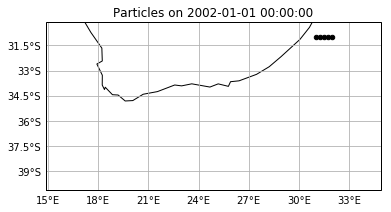

In [10]:
pset.show()

In [11]:
ds_new = xr.open_mfdataset('./work/data/socal_2017-01-0*.nc')

In [12]:
ds_new

<xarray.Dataset>
Dimensions:         (depth: 40, lat: 454, lon: 424, time: 16)
Coordinates:
  * depth           (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
  * lat             (lat) float64 25.0 25.03 25.07 25.1 ... 40.03 40.07 40.1
  * lon             (lon) float64 235.0 235.0 235.1 235.1 ... 249.0 249.1 249.1
  * time            (time) datetime64[ns] 2017-01-01 ... 2017-01-02T21:00:00
Data variables:
    salinity        (time, depth, lat, lon) float32 dask.array<shape=(16, 40, 454, 424), chunksize=(8, 40, 454, 424)>
    surf_atm_press  (time, lat, lon) float32 dask.array<shape=(16, 454, 424), chunksize=(8, 454, 424)>
    surf_el         (time, lat, lon) float32 dask.array<shape=(16, 454, 424), chunksize=(8, 454, 424)>
    water_temp      (time, depth, lat, lon) float32 dask.array<shape=(16, 40, 454, 424), chunksize=(8, 40, 454, 424)>
    water_u         (time, depth, lat, lon) float32 dask.array<shape=(16, 40, 454, 424), chunksize=(8, 40, 454, 424)>
    water_v         (tim

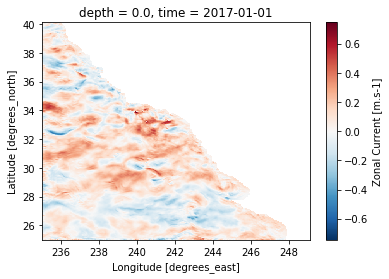

In [23]:
ds_new.water_u[0, 0, :, :].plot()

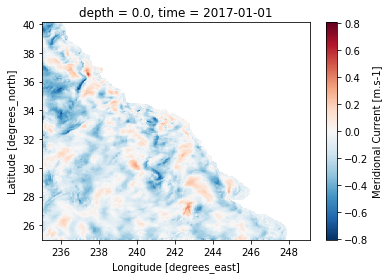

In [24]:
ds_new.water_v[0, 0, :, :].plot()